In [1]:
import keras
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten
from skimage import io, color
from PIL import Image
import matplotlib.pyplot as plt
import imageio
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt  
import keras
from keras.models import Sequential
from keras.layers import *
from keras.models import load_model 
from keras import optimizers
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
# 1. Create a TensorBoard logger
logger = keras.callbacks.TensorBoard(

    
    log_dir= "c:\logs",
    write_graph=True,
    histogram_freq=5
)

In [3]:
# 2. Load Diabetes dataset Diabetes_dataset.csv

df = pd.read_csv("C:\\Users\\or.hirshman\\Documents\\neural_network\\Diabetes_dataset.csv")

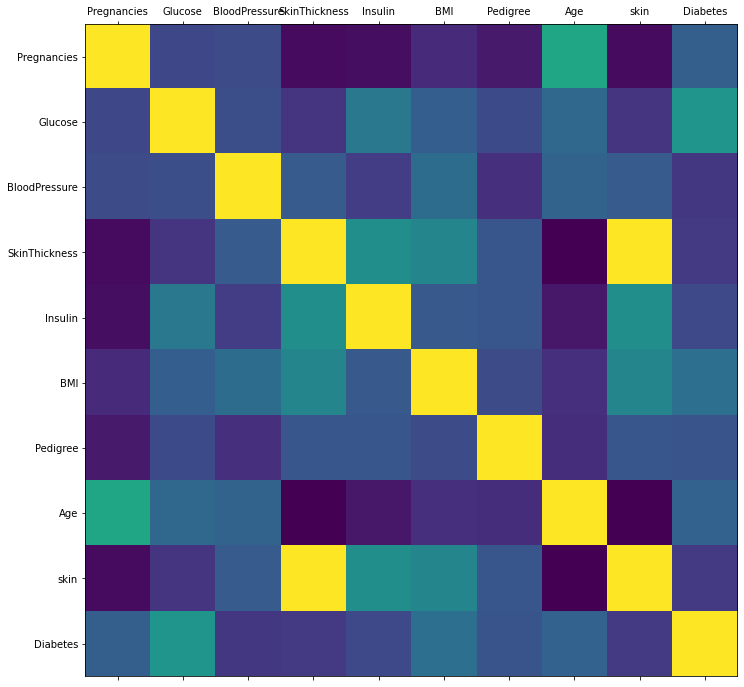

In [4]:
# 3. Try To find Corelated   features 
corr = df.corr()    # data frame correlation function
fig, ax = plt.subplots(figsize=(12, 12))
ax.matshow(corr)   # color code the rectangles by correlation value
plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks
plt.show() 

In [5]:
del df['skin']

In [6]:
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     Pedigree  Age  Diabetes  
0       0.627   50      True  
1       0.351   31 

In [42]:

diabetes_map = {True : 1, False : 0}
df['Diabetes'] =  df['Diabetes'].map(diabetes_map)

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
# 5. Create X (Features ) and Y (Colume to predict)

y = df['Diabetes'].values
X = df[df.columns[:-1]]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43) 

In [71]:
print(X_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
497            2       81             72             15       76  30.1   
520            2       68             70             32       66  25.0   
236            7      181             84             21      192  35.9   
141            5      106             82             30        0  39.5   
727            0      141             84             26        0  32.4   
..           ...      ...            ...            ...      ...   ...   
16             0      118             84             47      230  45.8   
58             0      146             82              0        0  40.5   
277            0      104             64             23      116  27.8   
255            1      113             64             35        0  33.6   
320            4      129             60             12      231  27.5   

     Pedigree  Age  
497     0.547   25  
520     0.187   25  
236     0.586   51  
141     0.286   38  
727   

In [72]:
# 7. Scale your data using MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_X = scaler.fit_transform(X_train)
scaled_testing_X = scaler.transform(X_test)

In [74]:
# 8. Create your Sequential Model and Add Dense layers
model = Sequential()
model.add(Dense(100,input_dim =8, activation ='relu'))
model.add(Dense(20, activation ='relu'))
model.add(Dense(80, activation ='relu'))
model.add(Dense(100, activation ='relu'))
model.add(Dense(1,activation = 'sigmoid'))


In [75]:
# 9. Compile your Model 
model.compile(optimizer=Adam(learning_rate=0.0001),loss='mean_squared_error', metrics=['accuracy'])

In [1]:
# 10. Fit your model with your training X and Y
model.fit(scaled_training_X,y_train,epochs=30,batch_size=2,verbose=2,callbacks=[logger])

NameError: name 'model' is not defined

In [82]:
# 11. evaluate your model with your testing X and Y
test_error_rate = model.evaluate(X_test, y_test)
 
_,accuracy = test_error_rate
print('Accuracy: %.2f' % (accuracy*100))

154/154 [==============================] - 0s 39us/step
Accuracy: 68.18


In [83]:
df_toPredict = pd.read_csv("C:\\Users\\or.hirshman\\Documents\\neural_network\\DataToPredict.csv")
df_toPredict.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,9,180,90,35,1,30,0.627,50


In [84]:
scaled_Data_To_Predict  = scaler.transform(df_toPredict)

In [85]:
result = model.predict(scaled_Data_To_Predict)

In [86]:
print(result)

[[0.31098172]]


In [87]:
result = model.predict_classes(scaled_Data_To_Predict)

In [69]:
print(result)

[[0]]
